In [3]:
# !unzip xturing-main.zip
!unzip xturing-main/examples/mathqa_data.zip

Archive:  xturing-main/examples/mathqa_data.zip
   creating: mathqa_data/
  inflating: mathqa_data/dataset_dict.json  
   creating: mathqa_data/train/
  inflating: mathqa_data/train/data-00000-of-00001.arrow  
  inflating: mathqa_data/train/dataset_info.json  
  inflating: mathqa_data/train/state.json  


In [2]:
!pwd
!ls

/home/sslashinin/kovakimyan/xturing/galactica
Untitled-Copy1.ipynb  xturing-main  xturing-main.zip


In [7]:
!python3 xturing-main/examples/galactica/galactica_lora.py

Setting ds_accelerator to cuda (auto detect)
instruction_dataset done
Loading checkpoint shards: 100%|██████████████████| 2/2 [00:28<00:00, 14.49s/it]
trainable params: 4194304 || all params: 6661554176 || trainable%: 0.06296284454326113
Initializes the model done
trainable params: 4194304 || all params: 6661554176 || trainable%: 0.06296284454326113
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
initializing deepspeed distributed: GLOBAL_RANK: 0, MEMBER: 1/1
[2023-06-05 21:44:40,969] [WARNING] [comm.py:152:init_deepspeed_backend] NCCL backend in DeepSpeed not yet implemented
Enabling DeepSpeed FP16.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]
Rank: 0 partition count [1] and sizes[(4194304, False)] 

  | Name          | Type      | Params
--------------------------------------------
0 | pytorch_model | LoraModel | 6.7 B 
--------------------------------------------
4.2 M     Trai

In [ ]:
import evaluate
accuracy_metric = evaluate.load("accuracy")
from xturing.models import BaseModel

model = BaseModel.create("galactica_lora")
e = torch.load('/home/sslashinin/kovakimyan/xturing/galactica/saved_model/pytorch_model.bin')
m = model.engine.model.load_state_dict(e)

In [ ]:
predictions = ["let x be the number of pages in the book. x / 3 + 90 = x 2 x / 3 = 90 x = 270 answer is a divide(90, const_2)"]
references = ["let xx be the total number of pages in the book , then she finished 23 ⋅ x 23 ⋅ x pages . then she has x − 23 ⋅ x = 13 ⋅ xx − 23 ⋅ x = 13 ⋅ x pages left . 23 ⋅ x − 13 ⋅ x = 9023 ⋅ x − 13 ⋅ x = 90 13 ⋅ x = 9013 ⋅ x = 90 x = 270 x = 270 so the book is 270 pages long . answer : b divide(90, subtract(const_1, divide(2, 3)))"]

results = accuracy_metric.compute(references=references, predictions=predictions)
results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
data0 = pd.read_csv('/home/sslashinin/kovakimyan/xturing_stack_ex/lightning_logs/version_0/metrics.csv')  

0


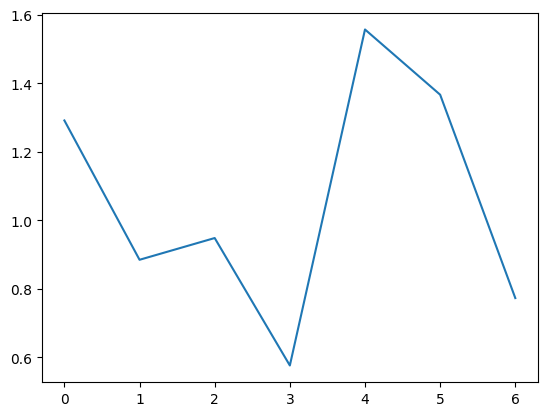

In [23]:
loss0 = np.array(data0['loss'])
new_loss0 = [sum(loss0[i:i+3000])/3000 for i in range(len(loss0[:])-3000)]
print(len(new_loss0))
plt.plot([i for i in range(len(loss0))], loss0)

In [30]:
data1 = pd.read_csv('lightning_logs/version_4/metrics.csv')  

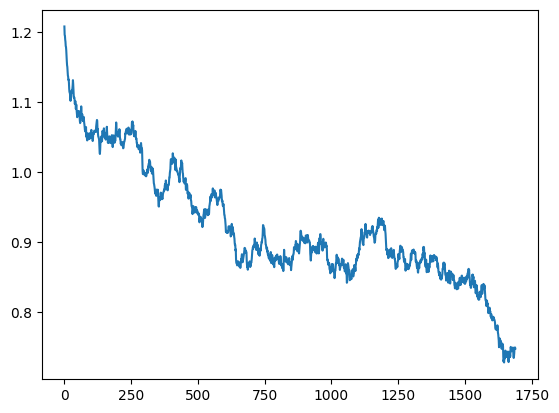

In [31]:
loss1 = np.array(data1['loss'])
new_loss1 = [sum(loss1[i:i+100])/100 for i in range(len(loss1[:])-100)]
plt.plot([i for i in range(len(new_loss1))], new_loss1)

In [32]:
data2 = pd.read_csv('lightning_logs/version_3/metrics.csv')  

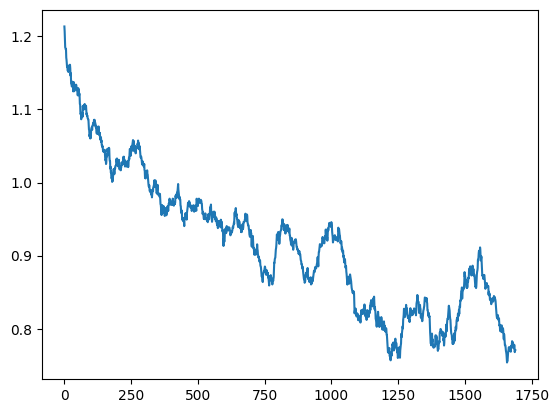

In [33]:
loss2 = np.array(data2['loss'])
new_loss2 = [sum(loss2[i:i+100])/100 for i in range(len(loss2[:])-100)]
plt.plot([i for i in range(len(new_loss2))], new_loss2)

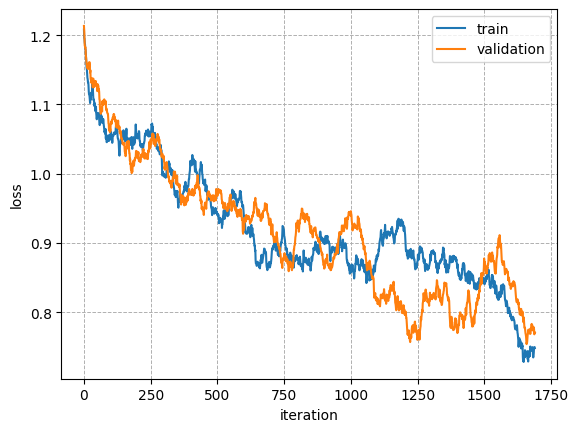

In [34]:
#plt.plot([i for i in range(len(new_loss0))], new_loss0, label="epoch 1")
plt.plot([i for i in range(len(new_loss1))], new_loss1, label="train")
plt.plot([i for i in range(len(new_loss2))], new_loss2, label="validation")
plt.grid(linestyle='--', linewidth=0.7)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

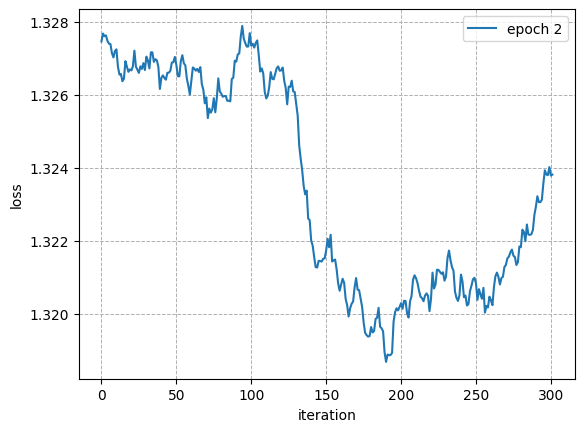

In [28]:
plt.plot([i for i in range(len(new_loss1))], new_loss1, label="epoch 2")
plt.grid(linestyle='--', linewidth=0.7)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

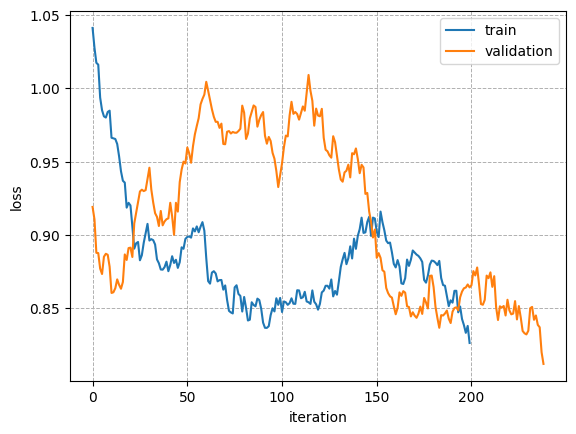

In [60]:
data5 = pd.read_csv('/home/sslashinin/kovakimyan/xturing/lightning_logs/version_0/metrics.csv')  
loss5 = np.array(data5['loss'])
new_loss5 = [sum(loss5[i:i+100])/100 for i in range(len(loss5[:])-100)]
plt.plot([i for i in range(len(new_loss5[:200]))], new_loss5[:200], label="train")

data6 = pd.read_csv('metrics.csv')  
loss6 = np.array(data6['loss'])
new_loss6 = [sum(loss6[i:i+100])/100 for i in range(len(loss6[:])-100)]
plt.plot([i for i in range(len(new_loss6))], new_loss6, label="validation")

plt.grid(linestyle='--', linewidth=0.7)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.legend()
plt.show()

In [37]:
!pwd

/home/sslashinin/kovakimyan/xturing/galactica
